## Quantum Fourier Transform

In [14]:
import math
from qiskit import BasicAer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram

In [19]:
def input_state(circ, q, n):
    for j in range(n):
        circ.h(q[j])
        circ.u1(-math.pi/float(2**(j)), q[j]).inverse()

def qft(circ, q, n):
    for j in range(n):
        circ.h(q[j])
        for k in range(j+1,n):
            circ.cu1(math.pi/float(2**(k-j)), q[k], q[j])
        circ.barrier()

OPENQASM 2.0;
include "qelib1.inc";
qreg x[3];
creg c[3];
h x[0];
u1(-3.14159265358979) x[0];
h x[1];
u1(-1.57079632679490) x[1];
h x[2];
u1(-0.785398163397448) x[2];



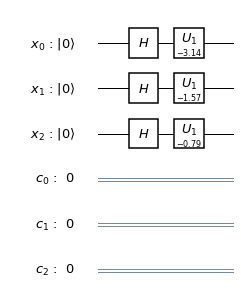

In [20]:
q = QuantumRegister(3, 'x')
c = ClassicalRegister(3, 'c')
qft3 = QuantumCircuit(q, c)

input_state(qft3, q, 3)

print(qft3.qasm())
qft3.draw(output='mpl')


OPENQASM 2.0;
include "qelib1.inc";
qreg x[3];
creg c[3];
h x[0];
u1(-3.14159265358979) x[0];
h x[1];
u1(-1.57079632679490) x[1];
h x[2];
u1(-0.785398163397448) x[2];
h x[0];
cu1(1.57079632679490) x[1],x[0];
cu1(0.785398163397448) x[2],x[0];
barrier x[0],x[1],x[2];
h x[1];
cu1(1.57079632679490) x[2],x[1];
barrier x[0],x[1],x[2];
h x[2];
barrier x[0],x[1],x[2];
measure x[0] -> c[0];
measure x[1] -> c[1];
measure x[2] -> c[2];



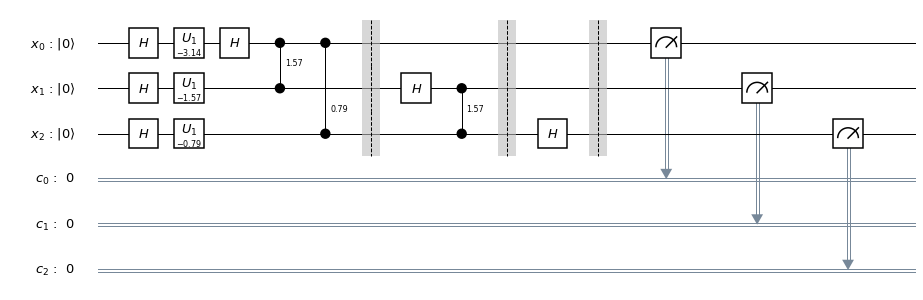

In [21]:
qft(qft3, q, 3)
for i in range(3):
    qft3.measure(q[i], c[i])

print(qft3.qasm())
qft3.draw(output='mpl')

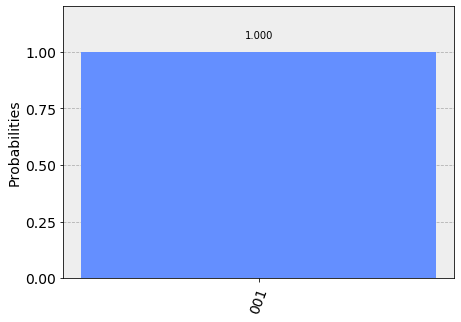

In [23]:
backend = BasicAer.get_backend("qasm_simulator")

simulate = execute(qft3, backend=backend, shots=1024).result()
plot_histogram(simulate.get_counts())
